In [1]:
df = pd.read_csv("/kaggle/input/e-commerce-customer-for-behavior-analysis/ecommerce_customer_data_custom_ratios.csv")
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


(   Customer ID        Purchase Date Product Category  Product Price  Quantity  \
 0        46251  2020-09-08 09:38:32      Electronics             12         3   
 1        46251  2022-03-05 12:56:35             Home            468         4   
 2        46251  2022-05-23 18:18:01             Home            288         2   
 3        46251  2020-11-12 13:13:29         Clothing            196         1   
 4        13593  2020-11-27 17:55:11             Home            449         1   
 
    Total Purchase Amount Payment Method  Customer Age  Returns  \
 0                    740    Credit Card            37      0.0   
 1                   2739         PayPal            37      0.0   
 2                   3196         PayPal            37      0.0   
 3                   3509         PayPal            37      0.0   
 4                   3452    Credit Card            49      0.0   
 
          Customer Name  Age  Gender  Churn  
 0  Christine Hernandez   37    Male      0  
 1  Christ

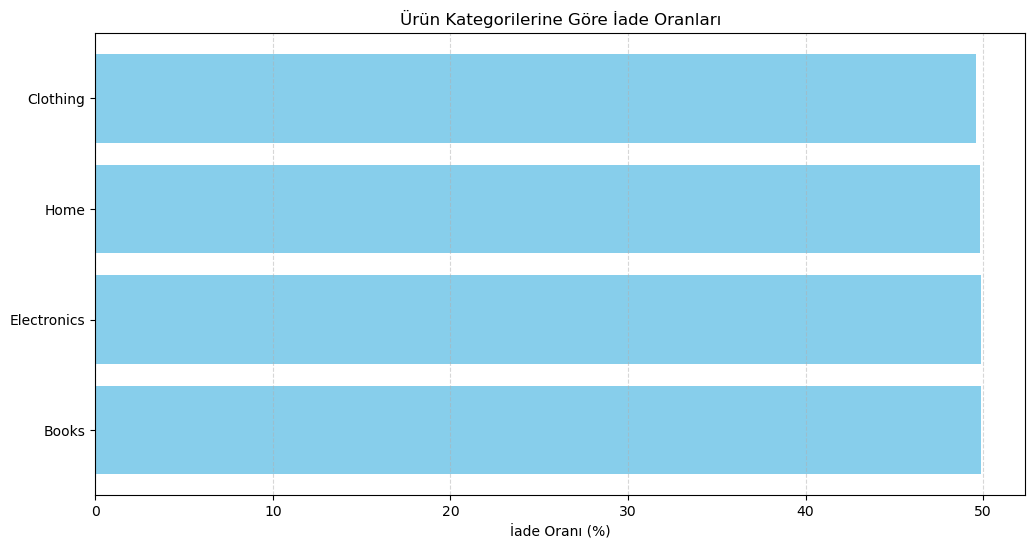

,Product Category,count,sum,Return Rate (%)
0,Books,60595,30229.0,49.886954
1,Electronics,40657,20271.0,49.858573
2,Home,40423,20147.0,49.840437
3,Clothing,60729,30122.0,49.600685


In [2]:
import matplotlib.pyplot as plt

# Ürün kategorilerine göre iade oranları
returns_by_category = df.groupby("Product Category")["Returns"].agg(['count', 'sum'])
returns_by_category['Return Rate (%)'] = (returns_by_category['sum'] / returns_by_category['count']) * 100

# Sıralama
returns_by_category = returns_by_category.sort_values(by="Return Rate (%)", ascending=False)

# Bar grafiği
plt.figure(figsize=(12, 6))
plt.barh(returns_by_category.index, returns_by_category['Return Rate (%)'], color='skyblue')
plt.xlabel("İade Oranı (%)")
plt.title("Ürün Kategorilerine Göre İade Oranları")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

returns_by_category.reset_index()



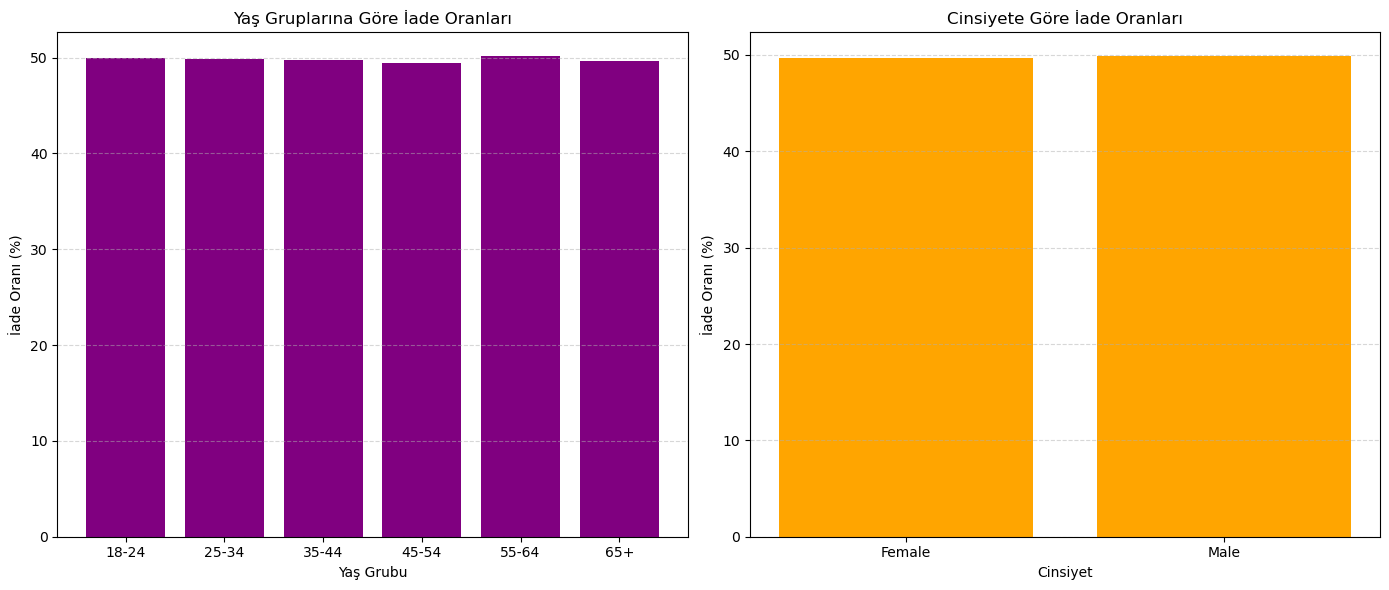

(  Age Group  count      sum  Return Rate (%)
 0     18-24  27311  13635.0        49.924939
 1     25-34  38112  18985.0        49.813707
 2     35-44  38173  18997.0        49.765541
 3     45-54  37740  18646.0        49.406465
 4     55-64  38147  19123.0        50.129761
 5       65+  22921  11383.0        49.661882,
    Gender   count      sum  Return Rate (%)
 0  Female  101798  50611.0        49.717087
 1    Male  100606  50158.0        49.855873)

In [3]:
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

df['Age Group'] = pd.cut(df['Customer Age'], bins=age_bins, labels=age_labels, right=False)

# Yaş gruplarına göre iade oranları
returns_by_age = df.groupby('Age Group', observed=False)['Returns'].agg(['count', 'sum'])
returns_by_age['Return Rate (%)'] = (returns_by_age['sum'] / returns_by_age['count']) * 100

# Cinsiyete göre iade oranları
returns_by_gender = df.groupby('Gender')['Returns'].agg(['count', 'sum'])
returns_by_gender['Return Rate (%)'] = (returns_by_gender['sum'] / returns_by_gender['count']) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Yaş grubu grafiği
axes[0].bar(returns_by_age.index, returns_by_age['Return Rate (%)'], color='purple')
axes[0].set_title("Yaş Gruplarına Göre İade Oranları")
axes[0].set_xlabel("Yaş Grubu")
axes[0].set_ylabel("İade Oranı (%)")
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Cinsiyet grafiği
axes[1].bar(returns_by_gender.index, returns_by_gender['Return Rate (%)'], color='orange')
axes[1].set_title("Cinsiyete Göre İade Oranları")
axes[1].set_xlabel("Cinsiyet")
axes[1].set_ylabel("İade Oranı (%)")
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

returns_by_age.reset_index(), returns_by_gender.reset_index()



## İade davranışı ile müşteri kaybı ilişkisi


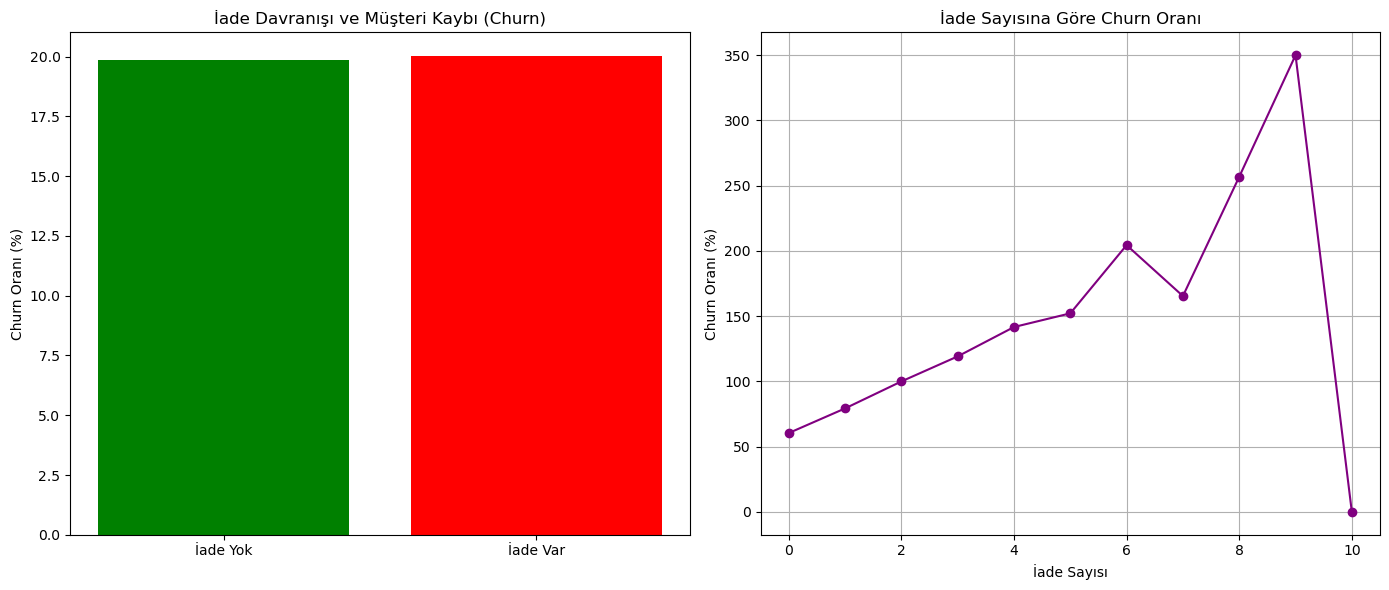

(   Returns   count    sum  Churn Rate (%)
 0      0.0  101635  20193       19.868156
 1      1.0  100769  20171       20.017069,
     Return Count  count    sum  Churn Rate (%)
 0            0.0   6449   3898       60.443480
 1            1.0  13420  10645       79.321908
 2            2.0  13381  13381      100.000000
 3            3.0   8977  10699      119.182355
 4            4.0   4711   6675      141.689662
 5            5.0   1886   2870      152.173913
 6            6.0    631   1290      204.437401
 7            7.0    162    268      165.432099
 8            8.0     44    113      256.818182
 9            9.0     10     35      350.000000
 10          10.0      2      0        0.000000)

In [4]:
# İade yapıp-yapmayan müşterilerin churn oranları

returns_vs_churn = df.groupby('Returns')['Churn'].agg(['count', 'sum'])
returns_vs_churn['Churn Rate (%)'] = (returns_vs_churn['sum'] / returns_vs_churn['count']) * 100

returns_count_churn = df.groupby(df['Customer ID'])[['Returns', 'Churn']].sum()
returns_count_churn['Return Count'] = returns_count_churn['Returns']

# İade sayısına göre churn oranları
returns_count_churn_rate = returns_count_churn.groupby('Return Count')['Churn'].agg(['count', 'sum'])
returns_count_churn_rate['Churn Rate (%)'] = (returns_count_churn_rate['sum'] / returns_count_churn_rate['count']) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# İade - churn ilişkisi grafiği
axes[0].bar(['İade Yok', 'İade Var'], returns_vs_churn['Churn Rate (%)'], color=['green', 'red'])
axes[0].set_title("İade Davranışı ve Müşteri Kaybı (Churn)")
axes[0].set_ylabel("Churn Oranı (%)")

axes[1].plot(returns_count_churn_rate.index, returns_count_churn_rate['Churn Rate (%)'], marker='o', color='purple')
axes[1].set_title("İade Sayısına Göre Churn Oranı")
axes[1].set_xlabel("İade Sayısı")
axes[1].set_ylabel("Churn Oranı (%)")
axes[1].grid()

plt.tight_layout()
plt.show()

returns_vs_churn.reset_index(), returns_count_churn_rate.reset_index()



# Ürün fiyatı sütununun minimum ve maksimum değerleri

In [5]:
df["Product Price"].describe()

count    250000.000000
mean        254.659512
std         141.568577
min          10.000000
25%         132.000000
50%         255.000000
75%         377.000000
max         500.000000
Name: Product Price, dtype: float64

In [6]:
# Fiyat aralıkları
df["Price Range"] = pd.cut(df["Product Price"], bins=[0, 50, 200, 500], 
                           labels=["0-50", "50-200", "200-500"])

# Fiyat aralıklarına göre iade oranı
price_return_rates = df.groupby("Price Range", observed=True)["Returns"].mean()

overall_return_rate = df["Returns"].mean()
category_return_rates = df.groupby("Product Category")["Returns"].mean().sort_values(ascending=False)
age_return_rates = df.groupby("Age Group", observed=True)["Returns"].mean()

overall_return_rate, category_return_rates, price_return_rates, age_return_rates


(0.4978607142151341,
 Product Category
 Books          0.498870
 Electronics    0.498586
 Home           0.498404
 Clothing       0.496007
 Name: Returns, dtype: float64,
 Price Range
 0-50       0.497066
 50-200     0.499258
 200-500    0.497268
 Name: Returns, dtype: float64,
 Age Group
 18-24    0.499249
 25-34    0.498137
 35-44    0.497655
 45-54    0.494065
 55-64    0.501298
 65+      0.496619
 Name: Returns, dtype: float64)

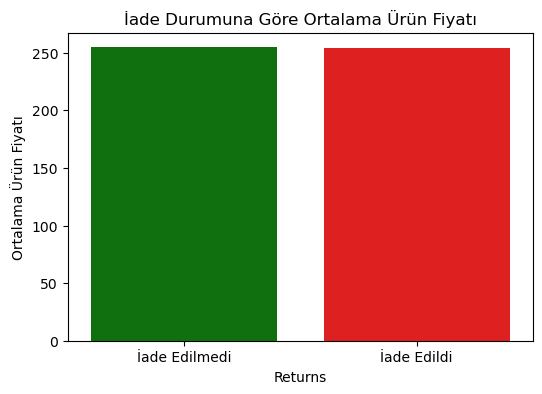

,Returns,Product Price
0,0.0,254.647395
1,1.0,254.105132


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ortalama fiyatları karşılaştırmak için iade edilen ve edilmeyen ürünlerin fiyat ortalaması
price_analysis = df.groupby("Returns")["Product Price"].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=price_analysis, x="Returns", y="Product Price", hue="Returns", palette=["green", "red"], legend=False)
plt.xticks(ticks=[0, 1], labels=["İade Edilmedi", "İade Edildi"])
plt.ylabel("Ortalama Ürün Fiyatı")
plt.title("İade Durumuna Göre Ortalama Ürün Fiyatı")
plt.show()


price_analysis


# Ödeme yöntemine göre toplam iade edilen ürün sayısı

In [8]:
returns_by_payment = df.groupby("Payment Method")["Returns"].sum().sort_values(ascending=False)
returns_by_payment

Payment Method
Credit Card    40525.0
PayPal         30184.0
Cash           20253.0
Crypto          9807.0
Name: Returns, dtype: float64

In [9]:
# Ödeme yöntemine göre toplam satın alma sayısı
total_purchases_by_payment = df.groupby("Payment Method")["Quantity"].sum()

# Her ödeme yöntemi için iade yüzdesi
return_rate_by_payment = (returns_by_payment / total_purchases_by_payment) * 100

return_rate_by_payment.sort_values(ascending=False)


Payment Method
Cash           13.531499
PayPal         13.445708
Credit Card    13.441886
Crypto         13.238391
dtype: float64

C:\Users\Mutlu\AppData\Local\Temp\ipykernel_15312\242919960.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=return_rate_by_payment.index, y=return_rate_by_payment.values, palette="coolwarm")


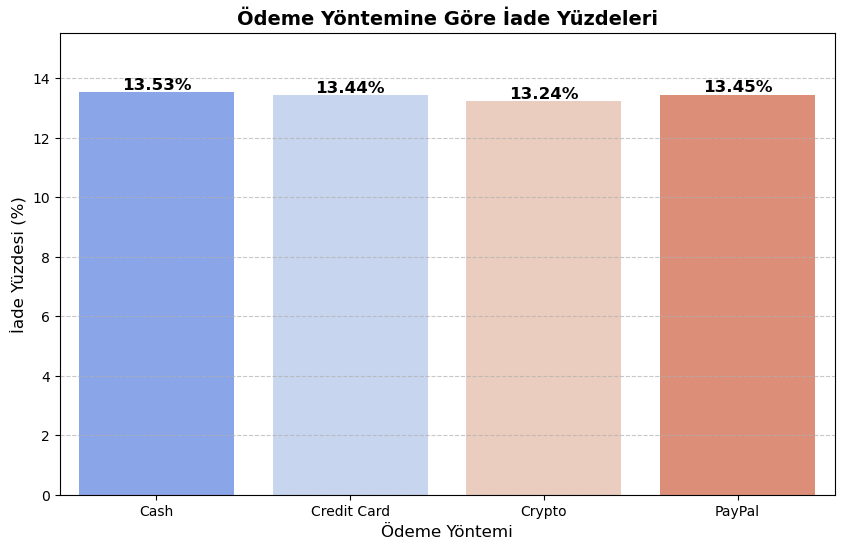

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.barplot(x=return_rate_by_payment.index, y=return_rate_by_payment.values, palette="coolwarm")

plt.title("Ödeme Yöntemine Göre İade Yüzdeleri", fontsize=14, fontweight="bold")
plt.xlabel("Ödeme Yöntemi", fontsize=12)
plt.ylabel("İade Yüzdesi (%)", fontsize=12)

for index, value in enumerate(return_rate_by_payment.values):
    plt.text(index, value + 0.1, f"{value:.2f}%", ha='center', fontsize=12, fontweight="bold")

plt.ylim(0, max(return_rate_by_payment.values) + 2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\Mutlu\AppData\Local\Temp\ipykernel_15312\901762388.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cart_value_by_payment.index, y=avg_cart_value_by_payment.values, palette="viridis", ax=axes[0, 0])
C:\Users\Mutlu\AppData\Local\Temp\ipykernel_15312\901762388.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_payment.index, y=churn_rate_by_payment.values, palette="coolwarm", ax=axes[0, 1])


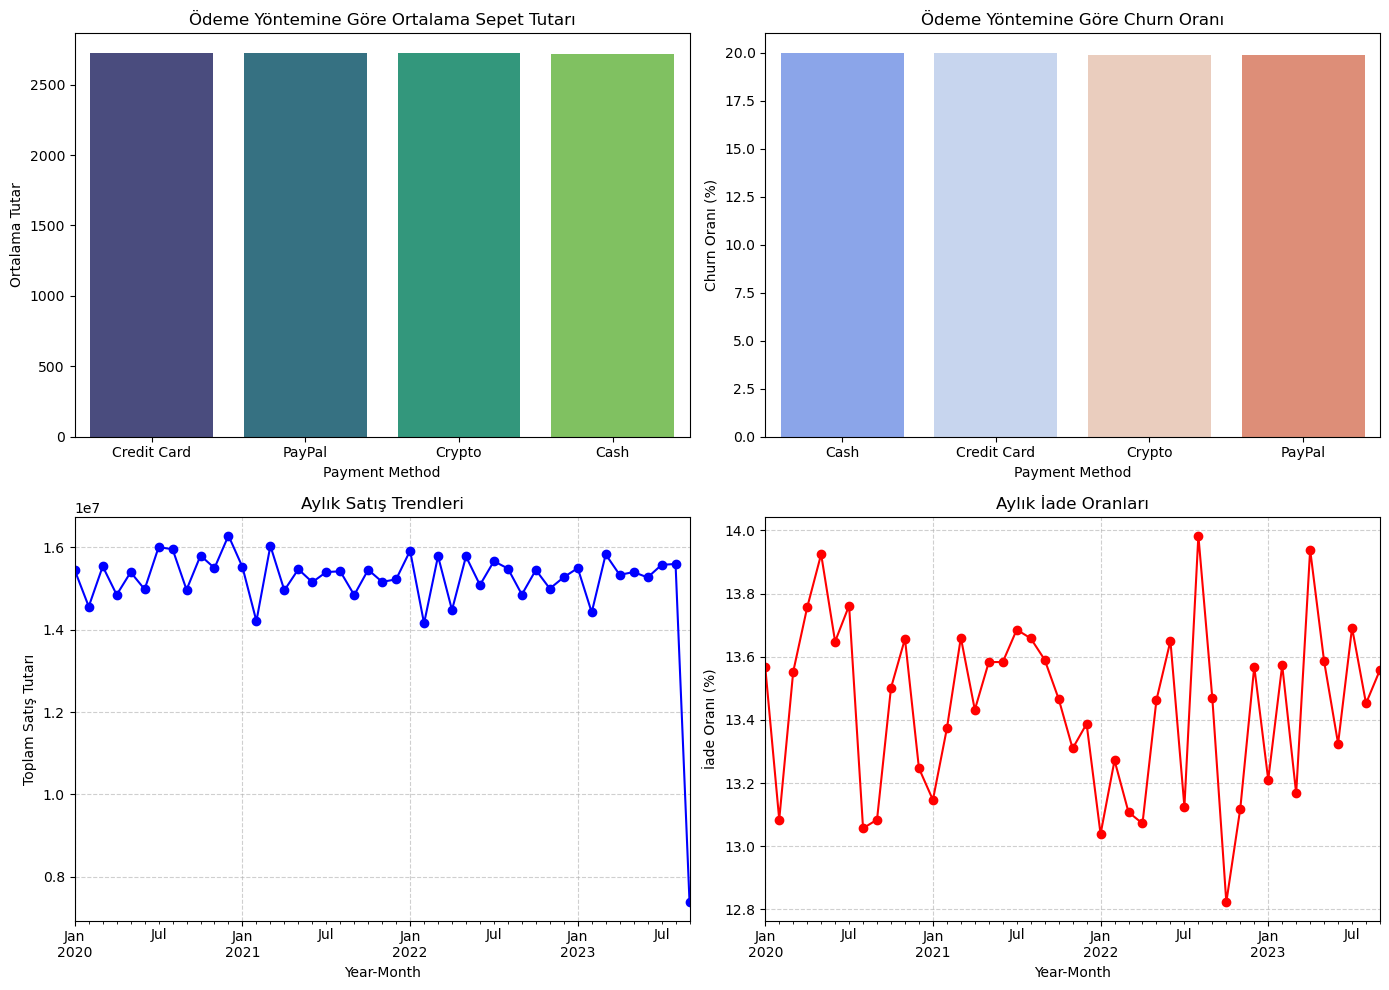

In [11]:
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])

# Ödeme yöntemine göre ortalama sepet tutarı
avg_cart_value_by_payment = df.groupby("Payment Method")["Total Purchase Amount"].mean().sort_values(ascending=False)

# Ödeme yöntemine göre müşteri sadakati (Churn Oranı)
churn_rate_by_payment = df.groupby("Payment Method")["Churn"].mean() * 100

# Aylık satış trendleri
df["Year-Month"] = df["Purchase Date"].dt.to_period("M")
monthly_sales = df.groupby("Year-Month")["Total Purchase Amount"].sum()

# Aylık iade oranları
monthly_returns = df.groupby("Year-Month")["Returns"].sum()
return_rate_by_month = (monthly_returns / df.groupby("Year-Month")["Quantity"].sum()) * 100

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Ödeme yöntemine göre ortalama sepet tutarı
sns.barplot(x=avg_cart_value_by_payment.index, y=avg_cart_value_by_payment.values, palette="viridis", ax=axes[0, 0])
axes[0, 0].set_title("Ödeme Yöntemine Göre Ortalama Sepet Tutarı")
axes[0, 0].set_ylabel("Ortalama Tutar")

# Ödeme yöntemine göre müşteri sadakati
sns.barplot(x=churn_rate_by_payment.index, y=churn_rate_by_payment.values, palette="coolwarm", ax=axes[0, 1])
axes[0, 1].set_title("Ödeme Yöntemine Göre Churn Oranı")
axes[0, 1].set_ylabel("Churn Oranı (%)")

# Aylık satış trendleri
monthly_sales.plot(ax=axes[1, 0], color="blue", marker="o", linestyle="-")
axes[1, 0].set_title("Aylık Satış Trendleri")
axes[1, 0].set_ylabel("Toplam Satış Tutarı")
axes[1, 0].grid(True, linestyle="--", alpha=0.6)

# Aylık iade oranları
return_rate_by_month.plot(ax=axes[1, 1], color="red", marker="o", linestyle="-")
axes[1, 1].set_title("Aylık İade Oranları")
axes[1, 1].set_ylabel("İade Oranı (%)")
axes[1, 1].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


C:\Users\Mutlu\AppData\Local\Temp\ipykernel_15312\1353558463.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_returned_categories.values, y=top_returned_categories.index, palette="Reds_r")


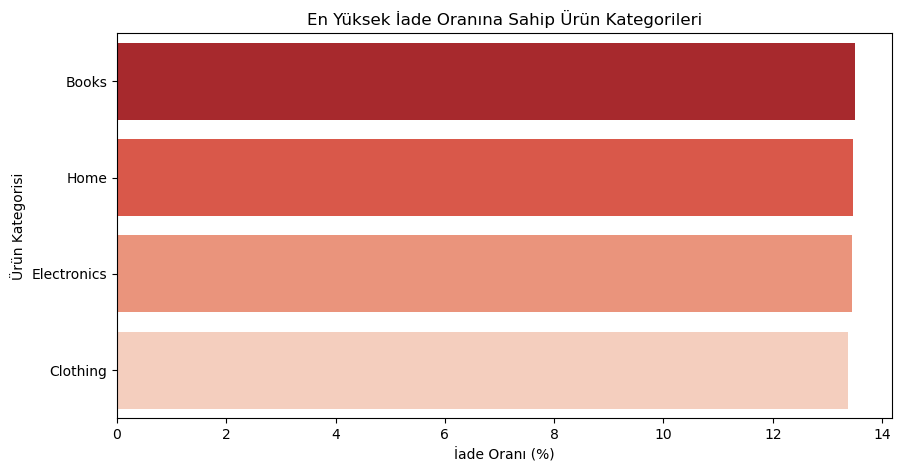

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ürün kategorisi bazında toplam satış ve iade miktarı
returns_by_category = df.groupby("Product Category")["Returns"].sum()
total_sold_by_category = df.groupby("Product Category")["Quantity"].sum()

# İade oranı
return_rate_by_category = (returns_by_category / total_sold_by_category) * 100

# En yüksek iade oranına sahip 10 ürün
top_returned_categories = return_rate_by_category.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_returned_categories.values, y=top_returned_categories.index, palette="Reds_r")
plt.xlabel("İade Oranı (%)")
plt.ylabel("Ürün Kategorisi")
plt.title("En Yüksek İade Oranına Sahip Ürün Kategorileri")
plt.show()


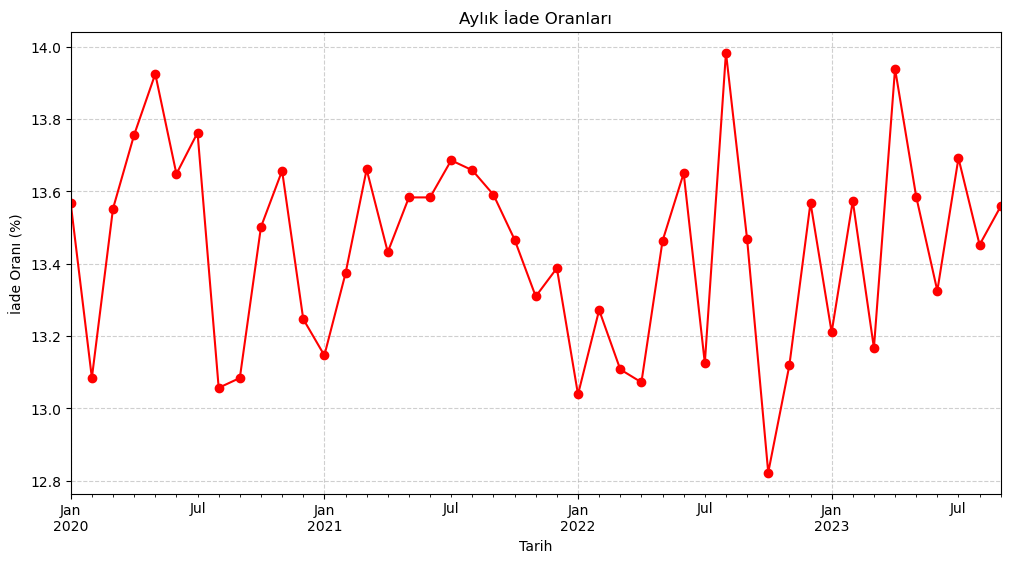

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])

# Aylık bazda toplam satış ve iade miktarları
df["Year-Month"] = df["Purchase Date"].dt.to_period("M")
monthly_returns = df.groupby("Year-Month")["Returns"].sum()
monthly_sales = df.groupby("Year-Month")["Quantity"].sum()

# Aylık iade oranı
return_rate_by_month = (monthly_returns / monthly_sales) * 100

# Aylık iade trendi
plt.figure(figsize=(12, 6))
return_rate_by_month.plot(marker="o", linestyle="-", color="red")
plt.title("Aylık İade Oranları")
plt.xlabel("Tarih")
plt.ylabel("İade Oranı (%)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


C:\Users\Mutlu\AppData\Local\Temp\ipykernel_15312\2283904619.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_loyalty.index, y=payment_loyalty.values, palette="Blues_d")


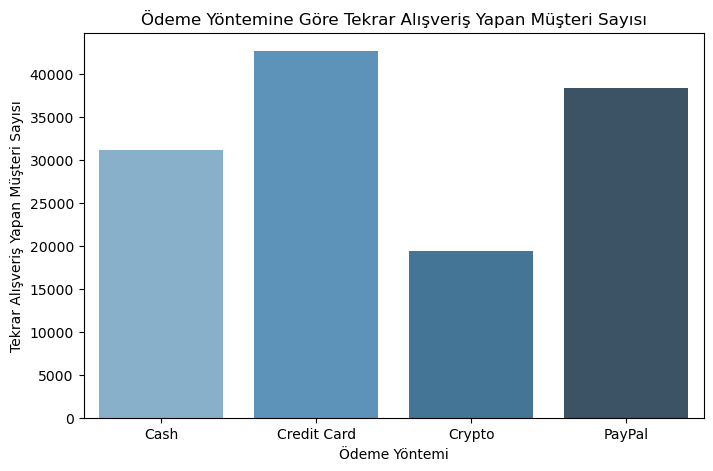

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Müşterinin tekrar alışveriş yapıp yapmadığı hesaplaması
repeat_customers = df.groupby("Customer ID")["Purchase Date"].count() > 1
repeat_customers_df = df[df["Customer ID"].isin(repeat_customers[repeat_customers].index)]

# Ödeme yöntemine göre tekrar alışveriş yapan müşteri sayısı
payment_loyalty = repeat_customers_df.groupby("Payment Method")["Customer ID"].nunique()

plt.figure(figsize=(8, 5))
sns.barplot(x=payment_loyalty.index, y=payment_loyalty.values, palette="Blues_d")
plt.title("Ödeme Yöntemine Göre Tekrar Alışveriş Yapan Müşteri Sayısı")
plt.xlabel("Ödeme Yöntemi")
plt.ylabel("Tekrar Alışveriş Yapan Müşteri Sayısı")
plt.show()


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Kategorik değişkenleri sayısal değerlere dönüştürme
df["Payment Method"] = df["Payment Method"].astype("category").cat.codes  

# Kullanılacak özellikler ve hedef değişken
features = ["Total Purchase Amount", "Quantity", "Payment Method", "Customer Age"]
X = df[features]
y = df["Returns"] > 0  # (1 = Evet, 0 = Hayır)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"İade Tahmin Modeli Doğruluk: {accuracy:.2%}")
print(classification_report(y_test, y_pred))


İade Tahmin Modeli Doğruluk: 52.36%
              precision    recall  f1-score   support

       False       0.60      0.62      0.61     29845
        True       0.41      0.39      0.40     20155

    accuracy                           0.52     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.52      0.52      0.52     50000



## RandomForest

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report

# Kategorik değişkenleri sayısal değerlere dönüştürme
df["Payment Method"] = LabelEncoder().fit_transform(df["Payment Method"])
df["Product Category"] = LabelEncoder().fit_transform(df["Product Category"])  # Yeni eklendi

# Kullanılacak özellikler
features = ["Total Purchase Amount", "Quantity", "Payment Method", "Customer Age", "Product Category"]
X = df[features]
y = df["Returns"] > 0  

# Veriyi dengelemek için SMOTE 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#  Standartlaştırma
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"İade Tahmin Modeli Doğruluk: {accuracy:.2%}")
print(classification_report(y_test, y_pred))


İade Tahmin Modeli Doğruluk: 54.41%
              precision    recall  f1-score   support

       False       0.55      0.54      0.54     29900
        True       0.54      0.55      0.55     29793

    accuracy                           0.54     59693
   macro avg       0.54      0.54      0.54     59693
weighted avg       0.54      0.54      0.54     59693



## xgboost

In [17]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report


df["Payment Method"] = LabelEncoder().fit_transform(df["Payment Method"])
df["Product Category"] = LabelEncoder().fit_transform(df["Product Category"])  
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])  

df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])
df["Weekday"] = df["Purchase Date"].dt.weekday  # Hafta içi / hafta sonu etkisi
df["Total Orders"] = df.groupby("Customer ID")["Purchase Date"].transform("count")  # Müşteri toplam sipariş sayısı
df["Past Returns"] = df.groupby("Customer ID")["Returns"].transform("sum")  # Müşteri geçmiş iadeleri

features = ["Total Purchase Amount", "Quantity", "Payment Method", "Customer Age", "Product Category", 
            "Gender", "Weekday", "Total Orders", "Past Returns"]

X = df[features]
y = df["Returns"] > 0  # İade yaptı mı? (1 = Evet, 0 = Hayır)

# SMOTE 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# XGBoost Modeli
model = xgb.XGBClassifier(n_estimators=300, max_depth=7, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"İade Tahmin Modeli Doğruluk: {accuracy:.2%}")
print(classification_report(y_test, y_pred))


İade Tahmin Modeli Doğruluk: 72.10%
              precision    recall  f1-score   support

       False       0.71      0.74      0.73     29900
        True       0.73      0.70      0.71     29793

    accuracy                           0.72     59693
   macro avg       0.72      0.72      0.72     59693
weighted avg       0.72      0.72      0.72     59693



## LightGBM-CatBoost-xgboost-random forest

In [18]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  


df["Payment Method"] = LabelEncoder().fit_transform(df["Payment Method"])
df["Product Category"] = LabelEncoder().fit_transform(df["Product Category"])  
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])  

df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])
df["Weekday"] = df["Purchase Date"].dt.weekday  # Hafta içi / hafta sonu etkisi
df["Total Orders"] = df.groupby("Customer ID")["Purchase Date"].transform("count")  # Müşteri toplam sipariş sayısı
df["Past Returns"] = df.groupby("Customer ID")["Returns"].transform("sum")  # Müşteri geçmiş iadeleri

features = ["Total Purchase Amount", "Quantity", "Payment Method", "Customer Age", "Product Category", 
            "Gender", "Weekday", "Total Orders", "Past Returns"]

X = df[features]
y = df["Returns"] > 0  # İade yaptı mı? (1 = Evet, 0 = Hayır)

# SMOTE 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=300, max_depth=7, learning_rate=0.05, random_state=42),
    "LightGBM": lgb.LGBMClassifier(n_estimators=300, max_depth=7, learning_rate=0.05, random_state=42),
    "CatBoost": cb.CatBoostClassifier(iterations=300, depth=7, learning_rate=0.05, random_state=42, verbose=0)
}

results = {}

for name, model in models.items():
    print(f"Model Eğitiliyor: {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results[name] = {
        "Accuracy": acc,
        "F1-Score (False)": report["False"]["f1-score"],
        "F1-Score (True)": report["True"]["f1-score"]
    }
    print(f"{name} Doğruluk: {acc:.4f}")

results_df = pd.DataFrame(results).T
print("\nModel Karşılaştırma Sonuçları:")
print(results_df)


Model Eğitiliyor: Random Forest...
Random Forest Doğruluk: 0.7185
Model Eğitiliyor: XGBoost...
XGBoost Doğruluk: 0.7210
Model Eğitiliyor: LightGBM...
[LightGBM] [Info] Number of positive: 119438, number of negative: 119331
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Number of data points in the train set: 238769, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500224 -> initscore=0.000896
[LightGBM] [Info] Start training from score 0.000896
LightGBM Doğruluk: 0.7241
Model Eğitiliyor: CatBoost...
CatBoost Doğruluk: 0.7245

Model Karşılaştırma Sonuçları:
               Accuracy  F1-Score (False)  F1-Score (True)
Random Forest  0.718493          0.710605         0.725962
XGBoost        0.720972          0.726987         0.714687
Li

Model Eğitiliyor: Random Forest...
Random Forest Doğruluk: 0.7185
Model Eğitiliyor: XGBoost...
XGBoost Doğruluk: 0.7210
Model Eğitiliyor: LightGBM...
[LightGBM] [Info] Number of positive: 119438, number of negative: 119331
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Number of data points in the train set: 238769, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500224 -> initscore=0.000896
[LightGBM] [Info] Start training from score 0.000896
LightGBM Doğruluk: 0.7241
Model Eğitiliyor: CatBoost...
CatBoost Doğruluk: 0.7245

Model Karşılaştırma Sonuçları:
               Accuracy F1-Score (False) F1-Score (True)  \
Random Forest  0.718493         0.710605        0.725962   
XGBoost        0.720972         0.726987        0.714687   

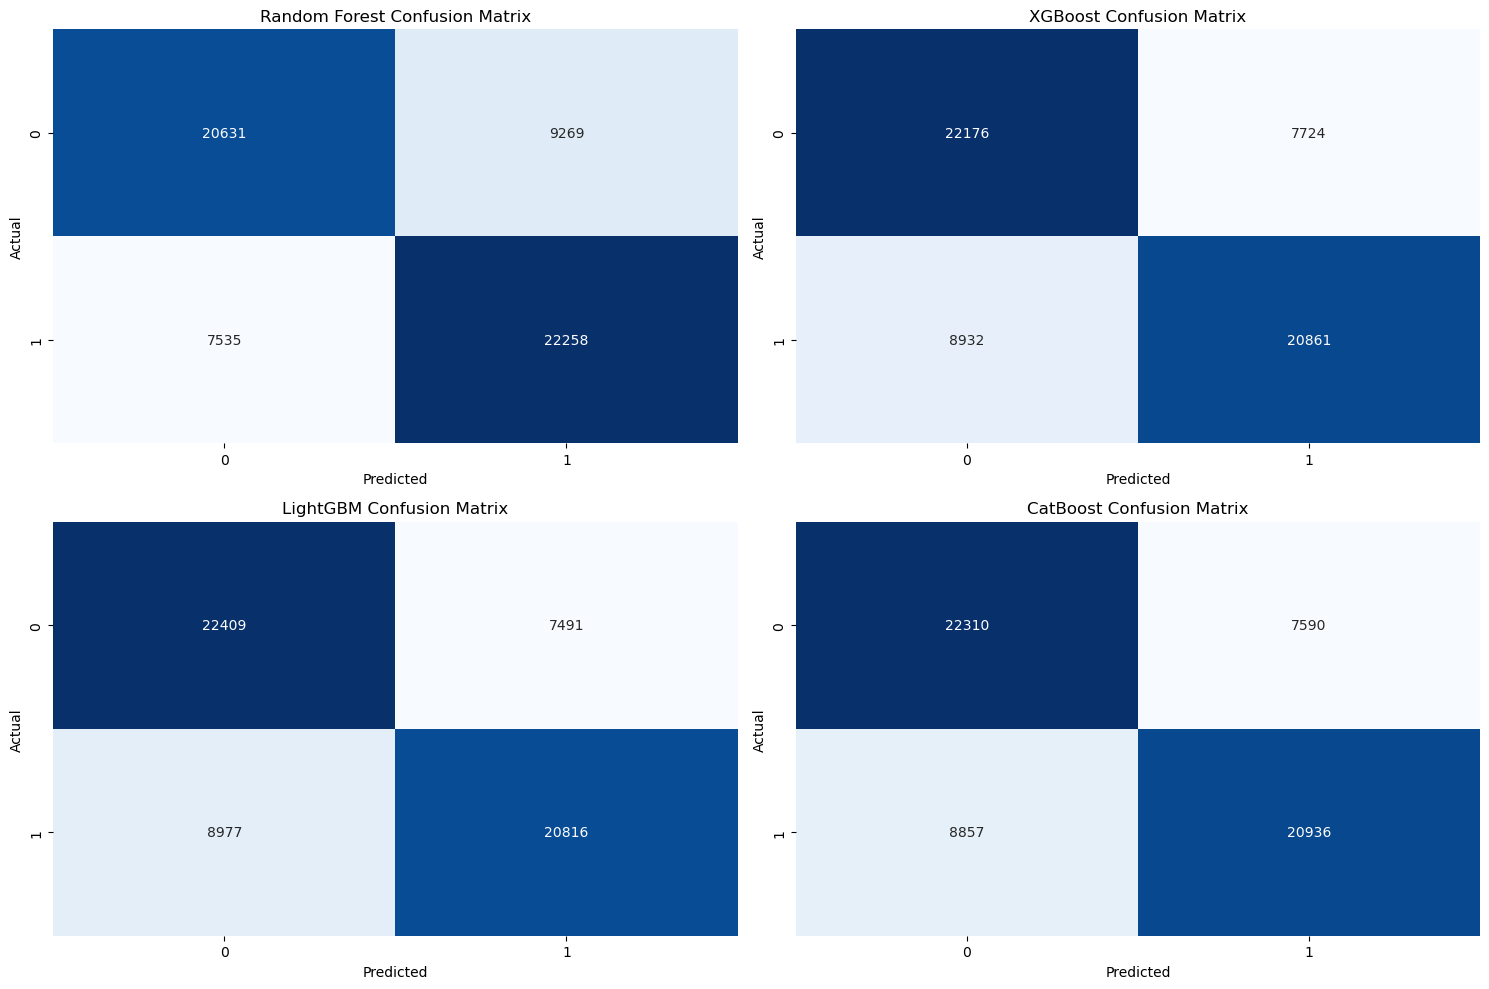

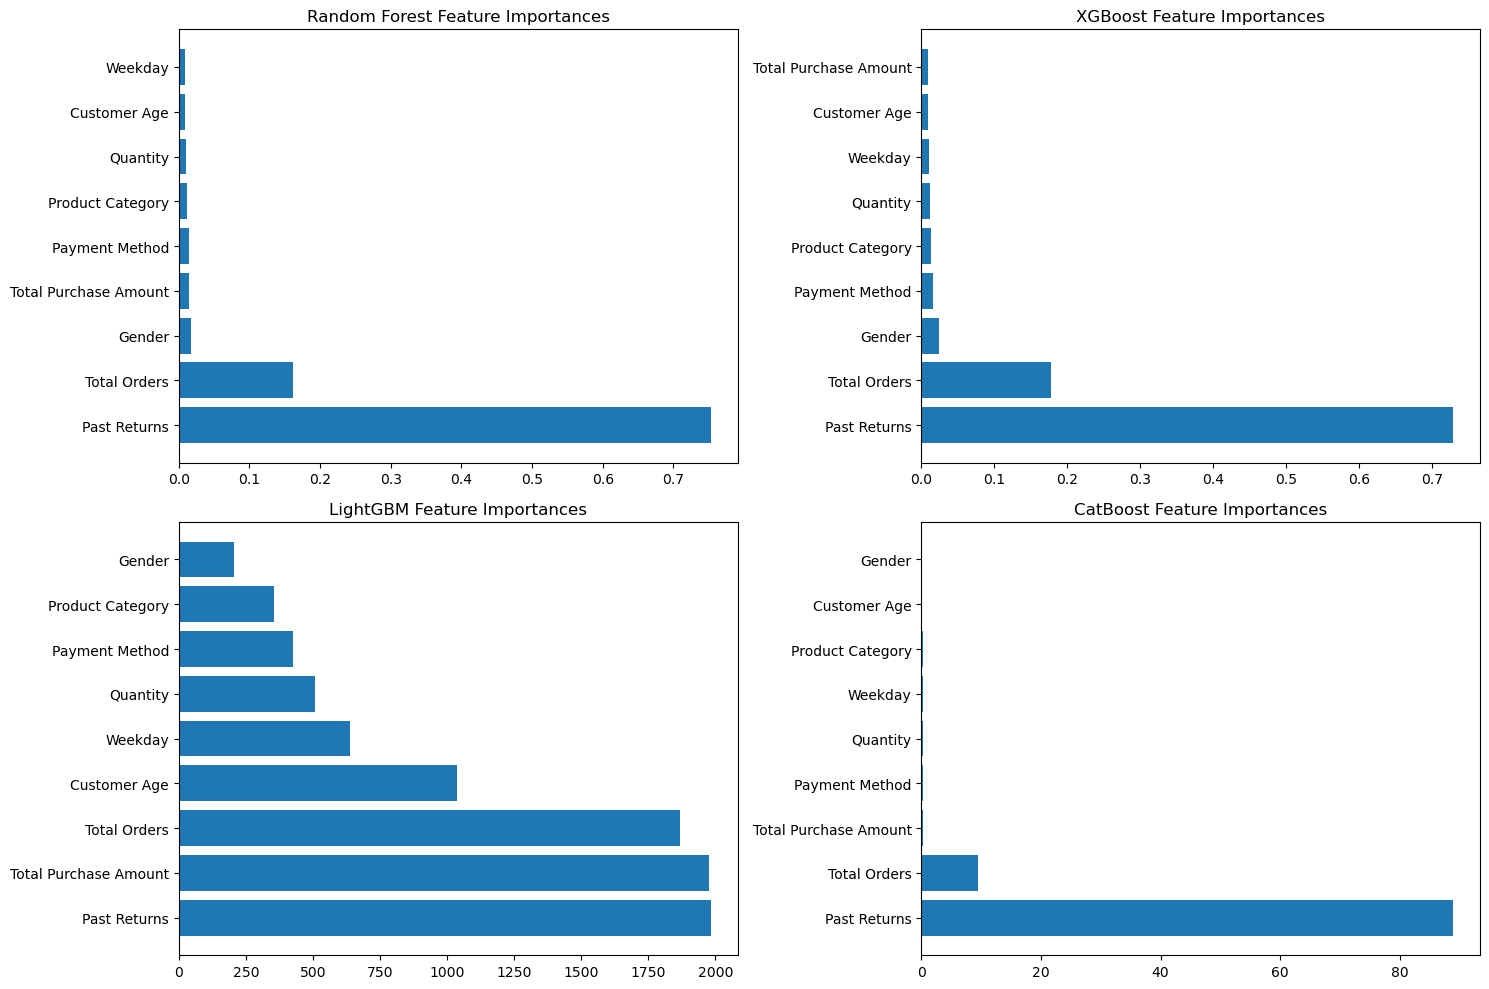

Random Forest CV Scores: [0.71876099 0.71859347 0.72329625 0.71935938 0.71842123]
Random Forest CV Mean Score: 0.7197
XGBoost CV Scores: [0.71991691 0.72053675 0.72403337 0.7226429  0.72121892]
XGBoost CV Mean Score: 0.7217
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 119385, number of negative: 119384
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 238769, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500002 -> initscore=0.000008
[LightGBM] [Info] Start training from score 0.000008
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 119384, number of negative: 119385
[LightGBM] [Info] Auto-choosing row-wise multi-thr

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os

os.environ["LOKY_MAX_CPU_COUNT"] = "4"


df["Payment Method"] = LabelEncoder().fit_transform(df["Payment Method"])
df["Product Category"] = LabelEncoder().fit_transform(df["Product Category"])
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])

df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])
df["Weekday"] = df["Purchase Date"].dt.weekday
df["Total Orders"] = df.groupby("Customer ID")["Purchase Date"].transform("count")
df["Past Returns"] = df.groupby("Customer ID")["Returns"].transform("sum")

features = ["Total Purchase Amount", "Quantity", "Payment Method", "Customer Age", "Product Category", 
            "Gender", "Weekday", "Total Orders", "Past Returns"]

X = df[features]
y = df["Returns"] > 0

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeller
time_models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=300, max_depth=7, learning_rate=0.05, random_state=42),
    "LightGBM": lgb.LGBMClassifier(n_estimators=300, max_depth=7, learning_rate=0.05, random_state=42),
    "CatBoost": cb.CatBoostClassifier(iterations=300, depth=7, learning_rate=0.05, random_state=42, verbose=0)
}

results = {}

for name, model in time_models.items():
    print(f"Model Eğitiliyor: {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        "Accuracy": acc,
        "F1-Score (False)": report["False"]["f1-score"],
        "F1-Score (True)": report["True"]["f1-score"],
        "Confusion Matrix": cm
    }
    print(f"{name} Doğruluk: {acc:.4f}")

results_df = pd.DataFrame(results).T
print("\nModel Karşılaştırma Sonuçları:")
print(results_df)

# Confusion matrix
plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(time_models.items()):
    plt.subplot(2, 2, i + 1)
    sns.heatmap(results[name]["Confusion Matrix"], annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Feature importance çizimi
plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(time_models.items()):
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.subplot(2, 2, i + 1)
        plt.barh([features[j] for j in indices], importances[indices])
        plt.title(f"{name} Feature Importances")
plt.tight_layout()
plt.show()

# Cross-validation
cv_results = {}
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, model in time_models.items():
    scores = cross_val_score(model, X_resampled, y_resampled, cv=kf, scoring='accuracy')
    cv_results[name] = scores
    print(f"{name} CV Scores: {scores}")
    print(f"{name} CV Mean Score: {scores.mean():.4f}")

cv_df = pd.DataFrame(cv_results)
print("\nCross Validation Scores:")
print(cv_df.describe().T)


Model Eğitiliyor: Random Forest...
Random Forest Doğruluk: 0.7185
Model Eğitiliyor: XGBoost...
XGBoost Doğruluk: 0.7210
Model Eğitiliyor: LightGBM...
[LightGBM] [Info] Number of positive: 119438, number of negative: 119331
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Number of data points in the train set: 238769, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500224 -> initscore=0.000896
[LightGBM] [Info] Start training from score 0.000896
LightGBM Doğruluk: 0.7241
Model Eğitiliyor: CatBoost...
CatBoost Doğruluk: 0.7245

Model Karşılaştırma Sonuçları:
               Accuracy F1-Score (False) F1-Score (True)  \
Random Forest  0.718493         0.710605        0.725962   
XGBoost        0.720972         0.726987        0.714687   

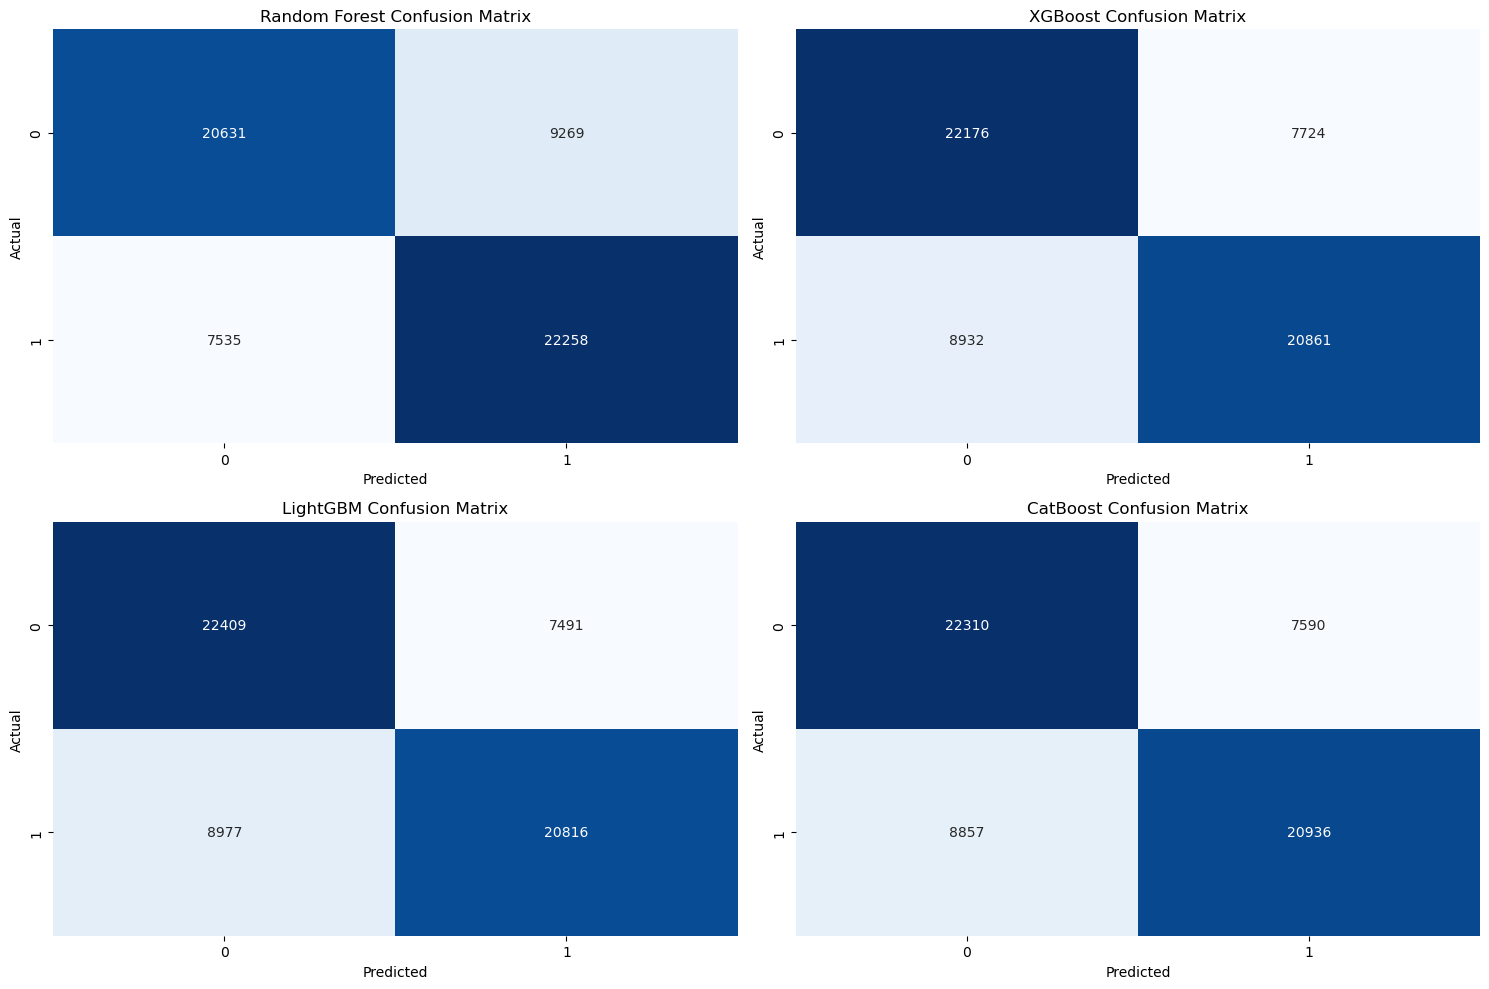

Random Forest CV Scores: [0.71876099 0.71859347 0.72329625 0.71935938 0.71842123]
Random Forest CV Mean Score: 0.7197
XGBoost CV Scores: [0.71991691 0.72053675 0.72403337 0.7226429  0.72121892]
XGBoost CV Mean Score: 0.7217
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 119385, number of negative: 119384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 238769, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500002 -> initscore=0.000008
[LightGBM] [Info] Start training from score 0.000008
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 119384, number of neg

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os

os.environ["LOKY_MAX_CPU_COUNT"] = "4"


df["Payment Method"] = LabelEncoder().fit_transform(df["Payment Method"])
df["Product Category"] = LabelEncoder().fit_transform(df["Product Category"])
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])

df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])
df["Weekday"] = df["Purchase Date"].dt.weekday
df["Total Orders"] = df.groupby("Customer ID")["Purchase Date"].transform("count")
df["Past Returns"] = df.groupby("Customer ID")["Returns"].transform("sum")

features = ["Total Purchase Amount", "Quantity", "Payment Method", "Customer Age", "Product Category", 
            "Gender", "Weekday", "Total Orders", "Past Returns"]

X = df[features]
y = df["Returns"] > 0

# SMOTE 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

time_models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=300, max_depth=7, learning_rate=0.05, random_state=42),
    "LightGBM": lgb.LGBMClassifier(n_estimators=300, max_depth=7, learning_rate=0.05, random_state=42),
    "CatBoost": cb.CatBoostClassifier(iterations=300, depth=7, learning_rate=0.05, random_state=42, verbose=0)
}

# Sonuçları saklama
results = {}
feature_importances = {}

for name, model in time_models.items():
    print(f"Model Eğitiliyor: {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        "Accuracy": acc,
        "F1-Score (False)": report["False"]["f1-score"],
        "F1-Score (True)": report["True"]["f1-score"],
        "Confusion Matrix": cm
    }
    
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        feature_importances[name] = [features[i] for i in indices[:3]]
    print(f"{name} Doğruluk: {acc:.4f}")

results_df = pd.DataFrame(results).T
print("\nModel Karşılaştırma Sonuçları:")
print(results_df)

# Feature importance sıralamaları
print("\nFeature Importances (Top 3):")
for name, important_features in feature_importances.items():
    print(f"{name}: {important_features}")

# confusion matrix
plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(time_models.items()):
    plt.subplot(2, 2, i + 1)
    sns.heatmap(results[name]["Confusion Matrix"], annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Cross-validation
cv_results = {}
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, model in time_models.items():
    scores = cross_val_score(model, X_resampled, y_resampled, cv=kf, scoring='accuracy')
    cv_results[name] = scores
    print(f"{name} CV Scores: {scores}")
    print(f"{name} CV Mean Score: {scores.mean():.4f}")

cv_df = pd.DataFrame(cv_results)
print("\nCross Validation Scores:")
print(cv_df.describe().T)


Model Eğitiliyor: Random Forest...
Random Forest Doğruluk: 0.7185
Model Eğitiliyor: XGBoost...
XGBoost Doğruluk: 0.7210
Model Eğitiliyor: LightGBM...
[LightGBM] [Info] Number of positive: 119438, number of negative: 119331
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Number of data points in the train set: 238769, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500224 -> initscore=0.000896
[LightGBM] [Info] Start training from score 0.000896
LightGBM Doğruluk: 0.7241
Model Eğitiliyor: CatBoost...
CatBoost Doğruluk: 0.7245
En iyi hiperparametreler: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500}


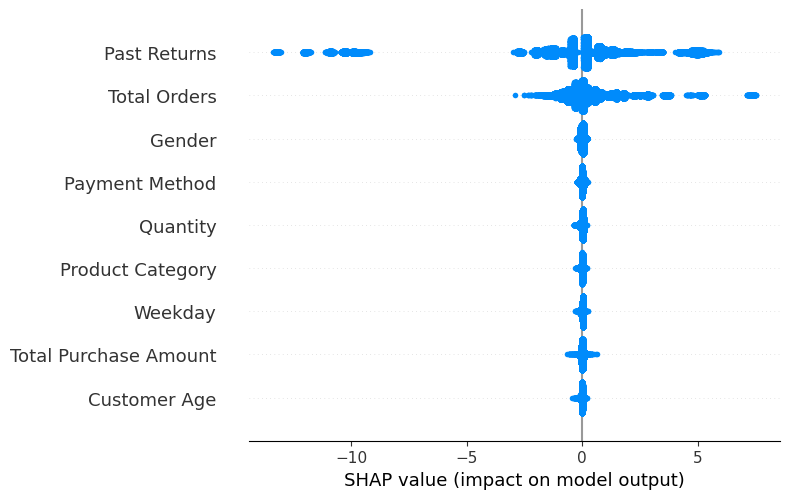

[LightGBM] [Info] Number of positive: 119438, number of negative: 119331
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Number of data points in the train set: 238769, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500224 -> initscore=0.000896
[LightGBM] [Info] Start training from score 0.000896
Ensemble Accuracy: 0.72410500393681
Random Forest CV Scores: [0.71876099 0.71859347 0.72329625 0.71935938 0.71842123]
Random Forest CV Mean Score: 0.7197
XGBoost CV Scores: [0.71991691 0.72053675 0.72403337 0.7226429  0.72121892]
XGBoost CV Mean Score: 0.7217
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 119385, number of negative: 119384
[LightGBM] [Info] Auto-choosin

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import shap
import os

os.environ["LOKY_MAX_CPU_COUNT"] = "4"


# Kategorik değişkenleri sayısal değerlere dönüştürme
df["Payment Method"] = LabelEncoder().fit_transform(df["Payment Method"])
df["Product Category"] = LabelEncoder().fit_transform(df["Product Category"])
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])

# Yeni özellikler
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])
df["Weekday"] = df["Purchase Date"].dt.weekday
df["Total Orders"] = df.groupby("Customer ID")["Purchase Date"].transform("count")
df["Past Returns"] = df.groupby("Customer ID")["Returns"].transform("sum")

# Özellikler
features = ["Total Purchase Amount", "Quantity", "Payment Method", "Customer Age", "Product Category", 
            "Gender", "Weekday", "Total Orders", "Past Returns"]

X = df[features]
y = df["Returns"] > 0

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeller
time_models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=300, max_depth=7, learning_rate=0.05, random_state=42),
    "LightGBM": lgb.LGBMClassifier(n_estimators=300, max_depth=7, learning_rate=0.05, random_state=42),
    "CatBoost": cb.CatBoostClassifier(iterations=300, depth=7, learning_rate=0.05, random_state=42, verbose=0)
}

results = {}
feature_importances = {}

for name, model in time_models.items():
    print(f"Model Eğitiliyor: {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        "Accuracy": acc,
        "F1-Score (False)": report["False"]["f1-score"],
        "F1-Score (True)": report["True"]["f1-score"],
        "Confusion Matrix": cm
    }
    
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        feature_importances[name] = [features[i] for i in indices[:3]]
    print(f"{name} Doğruluk: {acc:.4f}")

# Hiperparametre Optimizasyonu (Grid Search)
grid_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1]
}
grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42), grid_params, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("En iyi hiperparametreler:", grid_search.best_params_)

# Feature Engineering 
df['Amount_per_Order'] = df['Total Purchase Amount'] / df['Total Orders']
df['Return_Ratio'] = df['Past Returns'] / df['Total Orders']

# SHAP Analizi
explainer = shap.Explainer(time_models['XGBoost'])
shap_values = explainer(X_test)
shap.summary_plot(shap_values, features=X.columns)

# Ensemble (VotingClassifier)
voting_clf = VotingClassifier(estimators=[('rf', time_models['Random Forest']), ('xgb', time_models['XGBoost']), ('lgb', time_models['LightGBM']), ('cb', time_models['CatBoost'])], voting='soft')
voting_clf.fit(X_train, y_train)
y_pred_ensemble = voting_clf.predict(X_test)
print("Ensemble Accuracy:", accuracy_score(y_test, y_pred_ensemble))

# Cross-validation
cv_results = {}
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, model in time_models.items():
    scores = cross_val_score(model, X_resampled, y_resampled, cv=kf, scoring='accuracy')
    cv_results[name] = scores
    print(f"{name} CV Scores: {scores}")
    print(f"{name} CV Mean Score: {scores.mean():.4f}")

cv_df = pd.DataFrame(cv_results)
print("\nCross Validation Scores:")
print(cv_df.describe().T)
